In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbr
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
le = preprocessing.LabelEncoder()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
from sklearn import metrics
from sklearn import preprocessing

In [2]:
# let's open csv
data_raw = pd.read_csv('cinema1.csv')
data_raw.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,8,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN,1,0
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN,3,0
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,9,0


In [3]:
data_sp = data_raw.copy()
data_sp = data_sp.fillna(data_sp.mean())
data_sp = (data_sp.set_index(data_sp.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'}))
data_sp.head()
data_sp.shape[0]
#print(data_sp.shape[1])

data_sp = data_sp.drop(data_sp[data_sp['genres'] != 'Sci-Fi'].index)

In [4]:
# using LabelEncoding for some columns
data_reg = pd.DataFrame (data_sp, columns = ['director_name', 'imdb_score', 'actor_1_name', 'cast_total_facebook_likes', 'genres', 'gross', 'num_critic_for_reviews', 'duration', 'title_year', 'actor_2_facebook_likes', 'actor_2_name', 'country', 'language', 'color', 'num_voted_users','director_facebook_likes', 'content_rating', 'budget', 'aspect_ratio', 'actor_1_facebook_likes', 'actor_3_facebook_likes' ])
data_reg['genres'] = data_reg['genres'].astype(str)
data_reg['genres'] = le.fit_transform(data_reg['genres'])

data_reg['director_name'] = data_reg['director_name'].astype(str)
data_reg['director_name'] = le.fit_transform(data_reg['director_name'])

data_reg['actor_1_name'] = data_reg['actor_1_name'].astype(str)
data_reg['actor_1_name'] = le.fit_transform(data_reg['actor_1_name'])

data_reg['color'] = data_reg['color'].astype(str)
data_reg['color'] = le.fit_transform(data_reg['color'])

data_reg['language'] = data_reg['language'].astype(str)
data_reg['language'] = le.fit_transform(data_reg['language'])

data_reg['country'] = data_reg['country'].astype(str)
data_reg['country'] = le.fit_transform(data_reg['country'])

data_reg['content_rating'] = data_reg['content_rating'].astype(str)
data_reg['content_rating'] = le.fit_transform(data_reg['content_rating'])

data_reg['actor_2_name'] = data_reg['actor_2_name'].astype(str)
data_reg['actor_2_name'] = le.fit_transform(data_reg['actor_2_name'])

In [5]:
data_reg = data_reg.fillna(data_reg.mean())
print((data_reg.isnull().sum()/data_reg.shape[0])*100)

director_name                0.0
imdb_score                   0.0
actor_1_name                 0.0
cast_total_facebook_likes    0.0
genres                       0.0
gross                        0.0
num_critic_for_reviews       0.0
duration                     0.0
title_year                   0.0
actor_2_facebook_likes       0.0
actor_2_name                 0.0
country                      0.0
language                     0.0
color                        0.0
num_voted_users              0.0
director_facebook_likes      0.0
content_rating               0.0
budget                       0.0
aspect_ratio                 0.0
actor_1_facebook_likes       0.0
actor_3_facebook_likes       0.0
dtype: float64


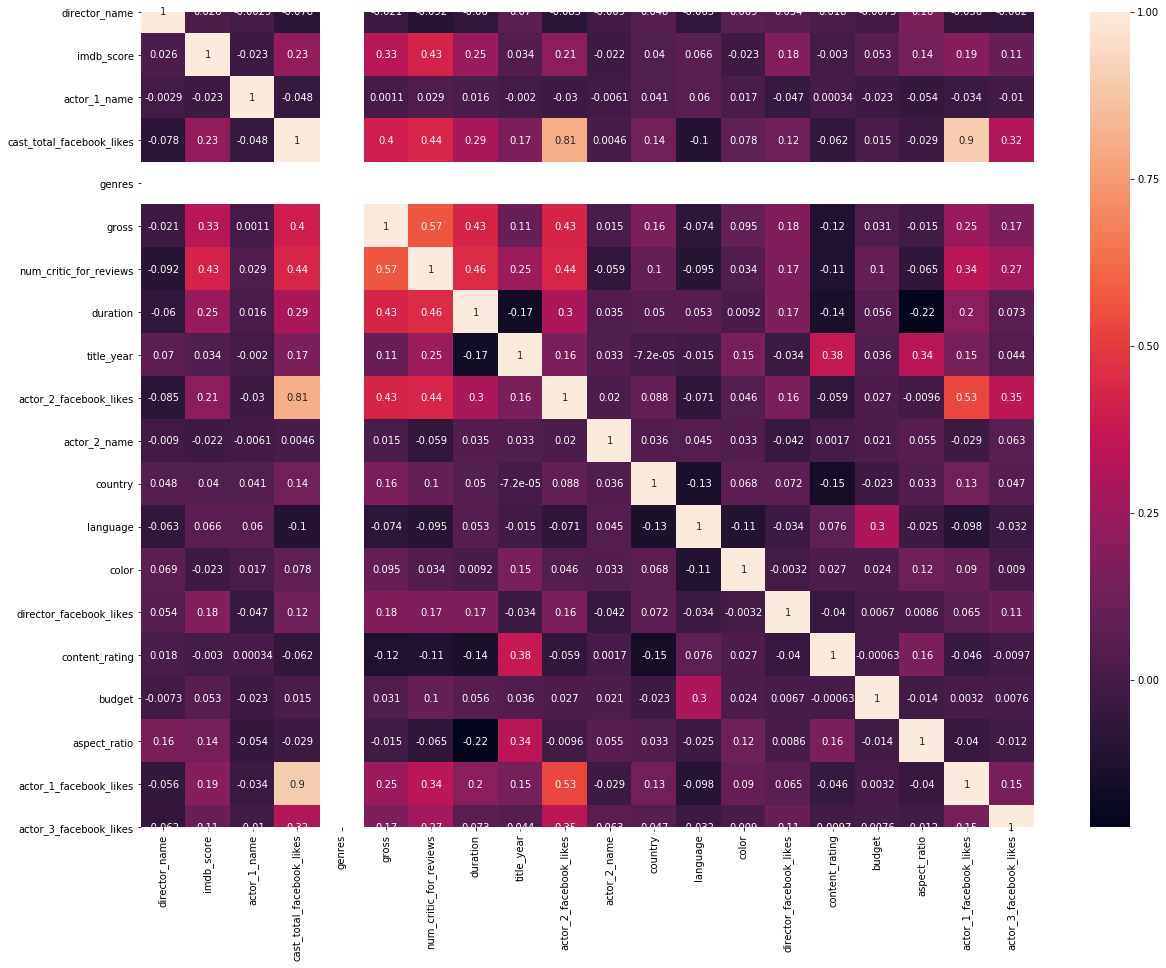

In [6]:
# let's see correlation table
plt.figure(figsize=(20, 15))
M = data_reg.corr()
sbr.heatmap(M, cbar=True, annot=True)

In [7]:
X = data_reg[['director_name', 'actor_1_name','imdb_score', 'cast_total_facebook_likes', 'num_critic_for_reviews', 'content_rating', 'country','language', 'duration', 'num_voted_users', 'budget', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'genres']]
Y = data_reg.gross

In [20]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y)
reg = LinearRegression().fit(X_train, Y_train)
#reg = BayesianRidge().fit(X_train, Y_train)
reg.fit(X_train, Y_train)
reg.predict(X_test)
score=reg.score(X_test,Y_test)

print(score)
print(reg.intercept_)
print(reg.coef_)

-2.705337573302048
6600818.856962979
[ 4.32841037e+04 -1.76739874e+03 -4.74123603e+06  1.93144500e+04
  4.62924980e+04 -2.54686952e+06  8.22244408e+05  2.33813160e+06
  2.37281203e+05  2.74243637e+02 -1.60611368e-03 -2.02746900e+04
 -1.63861210e+04 -2.78747648e+04  0.00000000e+00]


In [21]:
y_pred = reg.predict(X_test)
d_pred = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': y_pred.flatten()})
d_pred

,Actual,Predicted
0,4.951350e+07,1.906472e+07
1,4.951350e+07,-6.572493e+06
2,4.506389e+07,9.397313e+07
3,1.163124e+07,5.755175e+07
4,5.773519e+06,3.862761e+07
...,...,...
150,9.003011e+06,2.950819e+07
151,3.368527e+07,4.638689e+07
152,2.287562e+08,1.340608e+08
153,2.339150e+08,3.350210e+08


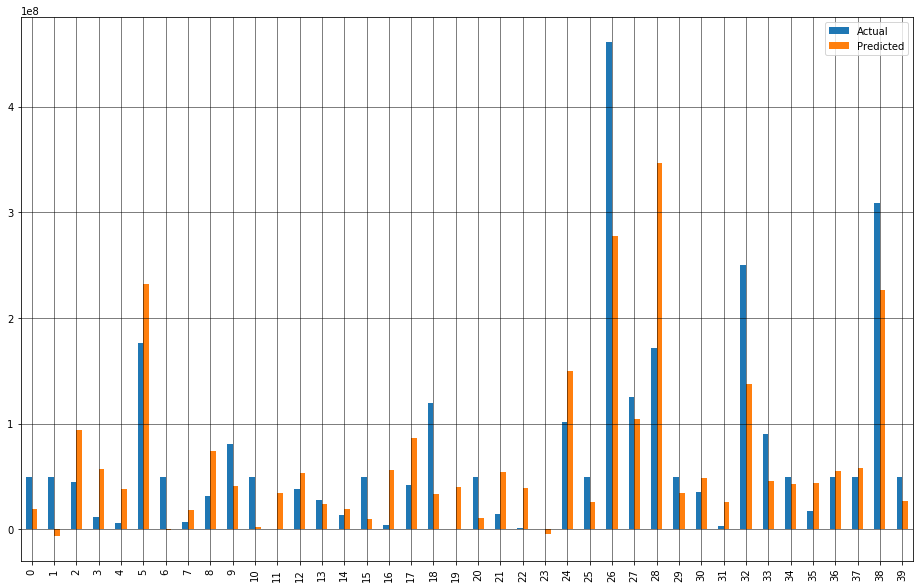

In [22]:
df1 = d_pred.head(40)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(linestyle='-', linewidth='0.5', color='black')
plt.show()

In [11]:
data_reg.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False)

director_name
140    8.800000
57     8.633333
161    8.400000
331    8.400000
110    8.300000
         ...   
84     2.800000
344    2.400000
401    2.300000
32     2.200000
0      1.900000
Name: imdb_score, Length: 418, dtype: float64

In [12]:
data_reg.groupby('actor_1_name')['actor_1_facebook_likes'].mean().sort_values(ascending=False)

actor_1_name
13     137000.0
321     49000.0
192     40000.0
174     34000.0
181     33000.0
         ...   
280         6.0
56          5.0
230         4.0
34          2.0
307       -32.0
Name: actor_1_facebook_likes, Length: 413, dtype: float64

In [13]:
d  = data_reg.drop(data_reg[data_reg['director_name'] != 140 ].index)
d.head()

,director_name,imdb_score,actor_1_name,cast_total_facebook_likes,genres,gross,num_critic_for_reviews,duration,title_year,actor_2_facebook_likes,actor_2_name,country,language,color,num_voted_users,director_facebook_likes,content_rating,budget,aspect_ratio,actor_1_facebook_likes,actor_3_facebook_likes
6795,140,8.8,141,12643,0,290158751.0,223.0,127.0,1980.0,504.0,274,19,2,1,837759,883.0,5,18000000.0,2.35,11000.0,441.0
